# Bondora Data Preprocessing 

In this project we will be doing credit risk modelling of peer to peer lending Bondora systems.Data for the study has been retrieved from a publicly available data set of a leading European P2P lending platform  ([**Bondora**](https://www.bondora.com/en/public-reports#dataset-file-format)).The retrieved data is a pool of both defaulted and non-defaulted loans from the time period between **1st March 2009** and **27th January 2020**. The data
comprises of demographic and financial information of borrowers, and loan transactions.In P2P lending, loans are typically uncollateralized and lenders seek higher returns as a compensation for the financial risk they take. In addition, they need to make decisions under information asymmetry that works in favor of the borrowers. In order to make rational decisions, lenders want to minimize the risk of default of each lending decision, and realize the return that compensates for the risk.

In this notebook we will preprocess the raw dataset and will create new preprocessed csv that can be used for building credit risk models.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.set_option('display.max_columns', 500)

# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.3f}'.format


# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm


# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
pio.templates.default="plotly_dark"
from plotly.subplots import make_subplots
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")

In [2]:
#read the csv file 
df_main=pd.read_csv('Bondora_raw.csv',low_memory=True)

In [3]:
#check the shape/ length of each dimension of the df
df_main.shape

(134529, 112)

In [4]:
#check the total number of elements
df_main.size

15067248

In [5]:
df_main.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,LoanApplicationStartedDate,LoanDate,ContractEndDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,DateOfBirth,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,NrOfDependants,EmploymentStatus,EmploymentDurationCurrentEmployer,EmploymentPosition,WorkExperience,OccupationArea,HomeOwnershipType,IncomeFromPrincipalEmployer,IncomeFromPension,IncomeFromFamilyAllowance,IncomeFromSocialWelfare,IncomeFromLeavePay,IncomeFromChildSupport,IncomeOther,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,ActiveScheduleFirstPaymentReached,PlannedPrincipalTillDate,PlannedInterestTillDate,LastPaymentOn,CurrentDebtDaysPrimary,DebtOccuredOn,CurrentDebtDaysSecondary,DebtOccuredOnForSecondary,ExpectedLoss,LossGivenDefault,ExpectedReturn,ProbabilityOfDefault,DefaultDate,PrincipalOverdueBySchedule,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,PrincipalRecovery,InterestRecovery,RecoveryStage,StageActiveSince,ModelVersion,Rating,EL_V0,Rating_V0,EL_V1,Rating_V1,Rating_V2,Status,Restructured,ActiveLateCategory,WorseLateCategory,CreditScoreEsMicroL,CreditScoreEsEquifaxRisk,CreditScoreFiAsiakasTietoRiskGrade,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalWriteOffs,InterestAndPenaltyWriteOffs,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.041,KARU,True,2009-06-11 16:40:39,2009-06-16,2010-07-06,2009-07-27,2010-06-25,2010-06-25,17,5,2.000,1,61,1947-11-26,1.000,EE,319.558,115.041,30.000,12,NaN,HARJU,TALLINN,7,3.000,1.000,0,3.000,UpTo3Years,klienditeenindaja,MoreThan25Years,7.000,NaN,6000.000,0.000,0.000,0.000,0.000,0.000,4500.000,10500.000,0,0.000,0,0.000,0.000,25,True,1800.000,319.080,2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,91-120,NaN,NaN,NaN,NaN,115.041,20.422,0.000,0.000,0.000,0.000,1,83.085,0.000,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.606,koort681,False,2009-06-10 15:48:57,2009-06-15,2009-07-07,2009-07-15,2009-07-15,2009-07-15,20,4,2.000,1,48,1960-11-05,1.000,EE,191.735,140.606,25.000,1,NaN,IDA-VIRU,KOHTLA-JARVE,7,5.000,4.000,0,3.000,MoreThan5Years,Õppealajuhataja lasteaias,MoreThan25Years,16.000,NaN,8300.000,0.000,0.000,0.000,0.000,0.000,2500.000,10800.000,0,0.000,0,0.000,0.000,15,True,2200.000,45.830,2009-07-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Repaid,False,NaN,NaN,NaN,NaN,NaN,NaN,140.606,2.023,0.000,0.000,0.000,0.000,2,255.647,258.626,0.000,0,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.558,0ie,True,2009-06-05 19:12:29,2009-06-15,NaN,2009-07-27,2011-02-25,2014-05-13,20,6,2.000,1,58,1950-11-13,1.000,EE,319.558,319.541,25.000,20,NaN,PÄRNU,PÄRNU,2,4.000,1.000,0,3.000,UpTo4Years,teenindaja,MoreThan25Years,9.000,NaN,5000.000,0.000,0.000,0.000,0.000,0.000,2000.000,7000.000,0,0.000,0,0.000,0.000,25,True,319.541,197.293,2012-10-01,2813.000,2012-05-14,2935.000,2012-01-13,NaN,NaN,NaN,NaN,2012-07-16,116.350,236.970,38.240,279.505,270.732,163.155,50.990,NaN,2016-03-03 00:00:0

## Data Understanding

| Feature                                | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
|----------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ActiveLateCategory                     | When a loan is in Principal Debt then it will be categorized by Principal Debt days                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| ActiveLateLastPaymentCategory          | Shows how many days has passed since last payment and categorised if it is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| ActiveScheduleFirstPaymentReached      | Whether the first payment date has been reached according to the active schedule                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| Age                                    | The age of the borrower when signing the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Amount                                 | Amount the borrower received on the Primary Market. This is the principal balance of your purchase from Secondary Market                                                                                                                                                                                                                                                                                                                                                                                            |
| AmountOfPreviousLoansBeforeLoan        | Value of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| AppliedAmount                          | The amount borrower applied for originally                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| AuctionBidNumber                       | Unique bid number which is accompanied by Auction number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| AuctionId                              | A unique number given to all auctions                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| AuctionName                            | Name of the Auction, in newer loans it is defined by the purpose of the loan                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| AuctionNumber                          | Unique auction number which is accompanied by Bid number                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| BidPrincipal                           | On Primary Market BidPrincipal is the amount you made your bid on. On Secondary Market BidPrincipal is the purchase price                                                                                                                                                                                                                                                                                                                                                                                           |
| BidsApi                                | The amount of investment offers made via Api                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| BidsManual                             | The amount of investment offers made manually                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| BidsPortfolioManager                   | The amount of investment offers made by Portfolio Managers                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| BoughtFromResale_Date                  | The time when the investment was purchased from the Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| City                                   | City of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ContractEndDate                        | The date when the loan contract ended                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| Country                                | Residency of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| County                                 | County of the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| CreditScoreEeMini                      | 1000 No previous payments problems 900 Payments problems finished 24-36 months ago 800 Payments problems finished 12-24 months ago 700 Payments problems finished 6-12 months ago 600 Payment problems finished < 6 months ago 500 Active payment problems                                                                                                                                                                                                                                                          |
| CreditScoreEsEquifaxRisk               | Generic score for the loan applicants that do not have active past due operations in ASNEF; a measure of the probability of default one year ahead; the score is given on a 6-grade scale: AAA (“Very low”), AA (“Low”), A (“Average”), B (“Average High”), C (“High”), D (“Very High”).                                                                                                                                                                                                                            |
| CreditScoreEsMicroL                    | A score that is specifically designed for risk classifying subprime borrowers (defined by Equifax as borrowers that do not have access to bank loans); a measure of the probability of default one month ahead; the score is given on a 10-grade scale, from the best score to the worst: M1, M2, M3, M4, M5, M6, M7, M8, M9, M10.                                                                                                                                                                                  |
| CreditScoreFiAsiakasTietoRiskGrade     | Credit Scoring model for Finnish Asiakastieto RL1 Very low risk 01-20 RL2 Low risk 21-40 RL3 Average risk 41-60 RL4 Big risk 61-80 RL5 Huge risk 81-100                                                                                                                                                                                                                                                                                                                                                             |
| CurrentDebtDaysPrimary                 | How long the loan has been in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| CurrentDebtDaysSecondary               | How long the loan has been in Interest Debt                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| DateOfBirth                            | The date of the borrower's birth                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| DebtOccuredOn                          | The date when Principal Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| DebtOccuredOnForSecondary              | The date when Interest Debt occurred                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| DebtToIncome                           | Ratio of borrower's monthly gross income that goes toward paying loans                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| DefaultDate                            | The date when loan went into defaulted state and collection process was started                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| DesiredDiscountRate                    | Investment being sold at a discount or premium                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| EAD1                                   | Exposure at default, outstanding principal at default                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| EAD2                                   | Exposure at default, loan amount less all payments prior to default                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Education                              | 1 Primary education 2 Basic education 3 Vocational education 4 Secondary education 5 Higher education                                                                                                                                                                                                                                                                                                                                                                                                               |
| EL_V0                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V1                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EL_V2                                  | Expected loss calculated by the specified version of Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| EmploymentDurationCurrentEmployer      | Employment time with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| EmploymentPosition                     | Employment position with the current employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| EmploymentStatus                       | 1 Unemployed 2 Partially employed 3 Fully employed 4 Self-employed 5 Entrepreneur 6 Retiree                                                                                                                                                                                                                                                                                                                                                                                                                         |
| ExistingLiabilities                    | Borrower's number of existing liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ExpectedLoss                           | Expected Loss calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| ExpectedReturn                         | Expected Return calculated by the current Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| FirstPaymentDate                       | First payment date according to initial loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| FreeCash                               | Discretionary income after monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| Gender                                 | 0 Male 1 Woman 2 Undefined                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| GracePeriodEnd                         | Date of the end of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| GracePeriodStart                       | Date of the beginning of Grace period                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| HomeOwnershipType                      | 0 Homeless 1 Owner 2 Living with parents 3 Tenant, pre-furnished property 4 Tenant, unfurnished property 5 Council house 6 Joint tenant 7 Joint ownership 8 Mortgage 9 Owner with encumbrance 10 Other                                                                                                                                                                                                                                                                                                              |
| IncomeFromChildSupport                 | Borrower's income from alimony payments                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| IncomeFromFamilyAllowance              | Borrower's income from child support                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeFromLeavePay                     | Borrower's income from paternity leave                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| IncomeFromPension                      | Borrower's income from pension                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| IncomeFromPrincipalEmployer            | Borrower's income from its employer                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| IncomeFromSocialWelfare                | Borrower's income from social support                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| IncomeOther                            | Borrower's income from other sources                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| IncomeTotal                            | Borrower's total income                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| Interest                               | Maximum interest rate accepted in the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyBalance              | Unpaid interest and penalties                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| InterestAndPenaltyDebtServicingCost    | Service cost related to the recovery of the debt based on the interest and penalties of the investment                                                                                                                                                                                                                                                                                                                                                                                                              |
| InterestAndPenaltyPaymentsMade         | Note owner received loan transfers earned interest, penalties total amount                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| InterestAndPenaltyWriteOffs            | Interest that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| InterestLateAmount                     | Interest debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| InterestRecovery                       | Interest recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LanguageCode                           | 1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LastPaymentOn                          | The date of the current last payment received from the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LiabilitiesTotal                       | Total monthly liabilities                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| ListedOnUTC                            | Date when the loan application appeared on Primary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LoanDate                               | Date when the loan was issued                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| LoanDuration                           | Current loan duration in months                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LoanId                                 | A unique ID given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| LoanNumber                             | A unique number given to all loan applications                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| LoanStatusActiveFrom                   | How long the current status has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| LossGivenDefault                       | Gives the percentage of outstanding exposure at the time of default that an investor is likely to lose if a loan actually defaults. This means the proportion of funds lost for the investor after all expected recovery and accounting for the time value of the money recovered. In general, LGD parameter is intended to be estimated based on the historical recoveries. However, in new markets where limited experience does not allow us more precise loss given default estimates, a LGD of 90% is assumed. |
| MaritalStatus                          | 1 Married 2 Cohabitant 3 Single 4 Divorced 5 Widow                                                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| MaturityDate_Last                      | Loan maturity date according to the current payment schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| MaturityDate_Original                  | Loan maturity date according to the original loan schedule                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| ModelVersion                           | The version of the Rating model used for issuing the Bondora Rating                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MonthlyPayment                         | Estimated amount the borrower has to pay every month                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| MonthlyPaymentDay                      | The day of the month the loan payments are scheduled for The actual date is adjusted for weekends and bank holidays (e.g. if 10th is Sunday then the payment will be made on the 11th in that month)                                                                                                                                                                                                                                                                                                                |
| NewCreditCustomer                      | Did the customer have prior credit history in Bondora 0 Customer had at least 3 months of credit history in Bondora 1 No prior credit history in Bondora                                                                                                                                                                                                                                                                                                                                                            |
| NextPaymentDate                        | According to schedule the next date for borrower to make their payment                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NextPaymentNr                          | According to schedule the number of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NextPaymentSum                         | According to schedule the amount of the next payment                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoOfPreviousLoansBeforeLoan            | Number of previous loans                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| note_id                                | A unique ID given to the investments                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| NoteLoanLateChargesPaid                | The amount of late charges the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| NoteLoanTransfersInterestAmount        | The amount of interest the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| NoteLoanTransfersMainAmount            | The amount of principal the note has received                                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| NrOfDependants                         | Number of children or other dependants                                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| NrOfScheduledPayments                  | According to schedule the count of scheduled payments                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| OccupationArea                         | 1 Other 2 Mining 3 Processing 4 Energy 5 Utilities 6 Construction 7 Retail and wholesale 8 Transport and warehousing 9 Hospitality and catering 10 Info and telecom 11 Finance and insurance 12 Real-estate 13 Research 14 Administrative 15 Civil service & military 16 Education 17 Healthcare and social help 18 Art and entertainment 19 Agriculture, forestry and fishing                                                                                                                                      |
| OnSaleSince                            | Time when the investment was added to Secondary Market                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| PenaltyLateAmount                      | Late charges debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PlannedInterestPostDefault             | The amount of interest that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| PlannedInterestTillDate                | According to active schedule the amount of interest the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PlannedPrincipalPostDefault            | The amount of principal that was planned to be received after the default occurred                                                                                                                                                                                                                                                                                                                                                                                                                                  |
| PlannedPrincipalTillDate               | According to active schedule the amount of principal the investment should have received                                                                                                                                                                                                                                                                                                                                                                                                                            |
| PreviousEarlyRepaymentsBeforeLoan      | How much was the early repayment amount before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| PreviousEarlyRepaymentsCountBeforeLoan | How many times the borrower had repaid early                                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PreviousRepaymentsBeforeLoan           | How much the borrower had repaid before the loan                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalBalance                       | Principal that still needs to be paid by the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalDebtServicingCost             | Service cost related to the recovery of the debt based on the principal of the investment                                                                                                                                                                                                                                                                                                                                                                                                                           |
| PrincipalLateAmount                    | Principal debt amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               |
| PrincipalOverdueBySchedule             | According to the current schedule, principal that is overdue                                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| PrincipalPaymentsMade                  | Note owner received loan transfers principal amount                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| PrincipalRecovery                      | Principal recovered due to collection process from in debt loans                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| PrincipalWriteOffs                     | Principal that was written off on the investment                                                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| ProbabilityOfDefault                   | Probability of Default, refers to a loan’s probability of default within one year horizon.                                                                                                                                                                                                                                                                                                                                                                                                                          |
| PurchasePrice                          | Investment amount or secondary market purchase price                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| Rating                                 | Bondora Rating issued by the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Rating_V0                              | Bondora Rating issued by version 0 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V1                              | Bondora Rating issued by version 1 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| Rating_V2                              | Bondora Rating issued by version 2 of the Rating model                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| RecoveryStage                          | Current stage according to the recovery model 1 Collection 2 Recovery 3 Write Off                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| RefinanceLiabilities                   | The total amount of liabilities after refinancing                                                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| ReScheduledOn                          | The date when the a new schedule was assigned to the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Restructured                           | The original maturity date of the loan has been increased by more than 60 days                                                                                                                                                                                                                                                                                                                                                                                                                                      |
| SoldInResale_Date                      | The date when the investment was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| SoldInResale_Price                     | The price of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| SoldInResale_Principal                 | The principal remaining of the investment that was sold on Secondary market                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| StageActiveSince                       | How long the current recovery stage has been active                                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Status                                 | The current status of the loan application                                                                                                                                                                                                                                                                                                                                                                                                                                                                          |
| UseOfLoan                              | 0 Loan consolidation 1 Real estate 2 Home improvement 3 Business 4 Education 5 Travel 6 Vehicle 7 Other 8 Health 101 Working capital financing 102 Purchase of machinery equipment 103 Renovation of real estate 104 Accounts receivable financing 105 Acquisition of means of transport 106 Construction finance 107 Acquisition of stocks 108 Acquisition of real estate 109 Guaranteeing obligation 110 Other business All codes in format 1XX are for business loans that are not supported since October 2012  |
| UserName                               | The user name generated by the system for the borrower                                                                                                                                                                                                                                                                                                                                                                                                                                                              |
| VerificationType                       | Method used for loan application data verification 0 Not set 1 Income unverified 2 Income unverified, cross-referenced by phone 3 Income verified 4 Income and expenses verified                                                                                                                                                                                                                                                                                                                                    |
| WorkExperience                         | Borrower's overall work experience in years                                                                                                                                                                                                                                                                                                                                                                                                                                                                         |
| WorseLateCategory                      | Displays the last longest period of days when the loan was in Principal Debt                                                                                                                                                                                                                                                                                                                                                                                                                                        |
| XIRR                                   | XIRR (extended internal rate of return) is a methodology to calculate the net return using the loan issued date and amount, loan repayment dates and amounts and the principal balance according to the original repayment date. All overdue principal payments are written off immediately. No provisions for future losses are made & only received (not accrued or scheduled) interest payments are taken into account.                                                                                          |

# Target variable

In [6]:
# "STATUS" IS OUR TARGET VARIABLE
t_v = df_main['Status']
t_v

0         Repaid
1         Repaid
2           Late
3         Repaid
4         Repaid
           ...  
134524    Repaid
134525    Repaid
134526      Late
134527    Repaid
134528      Late
Name: Status, Length: 134529, dtype: object

# Percentage of Missing Values

In [7]:
# To show all the rows of pandas dataframe
# df.isnull().sum()*100/len(df)

total_missing_val=df_main.isnull().sum()*100/len(df_main)

def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

print_full(total_missing_val)

# df.isnull().mean().tolist()

ReportAsOfEOD                             0.000
LoanId                                    0.000
LoanNumber                                0.000
ListedOnUTC                               0.000
BiddingStartedOn                          0.000
BidsPortfolioManager                      0.000
BidsApi                                   0.000
BidsManual                                0.000
UserName                                  0.000
NewCreditCustomer                         0.000
LoanApplicationStartedDate                0.000
LoanDate                                  0.000
ContractEndDate                          56.156
FirstPaymentDate                          0.000
MaturityDate_Original                     0.000
MaturityDate_Last                         0.000
ApplicationSignedHour                     0.000
ApplicationSignedWeekday                  0.000
VerificationType                          0.033
LanguageCode                              0.000
Age                                     

# Removing all the features which have more than 40% missing values

In [8]:
# removing the columns having more than 40% missing values
df_val_null_less_then_40 = df_main.columns[total_missing_val <40]
df_val_null_less_then_40

# df[df.columns[df.isnull().mean() < 0.4]]

Index(['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC',
       'BiddingStartedOn', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'UserName', 'NewCreditCustomer', 'LoanApplicationStartedDate',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'ApplicationSignedHour',
       'ApplicationSignedWeekday', 'VerificationType', 'LanguageCode', 'Age',
       'DateOfBirth', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther',
       'IncomeTotal', 'ExistingLiabilities', 'LiabilitiesTotal',
       'RefinanceLiabilities', 'DebtToIncome'

In [9]:
# print missing values columns 

miss_col=['ContractEndDate', 'NrOfDependants', 'EmploymentPosition',
       'WorkExperience', 'PlannedPrincipalTillDate', 'CurrentDebtDaysPrimary',
       'DebtOccuredOn', 'CurrentDebtDaysSecondary',
       'DebtOccuredOnForSecondary',
       'PlannedPrincipalPostDefault', 'PlannedInterestPostDefault', 'EAD1',
       'EAD2', 'PrincipalRecovery', 'InterestRecovery', 'RecoveryStage',
       'EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'ActiveLateCategory', 'CreditScoreEsEquifaxRisk',
       'CreditScoreFiAsiakasTietoRiskGrade', 'CreditScoreEeMini',
       'PrincipalWriteOffs', 'InterestAndPenaltyWriteOffs',
       'PreviousEarlyRepaymentsBefoleLoan', 'GracePeriodStart',
       'GracePeriodEnd', 'NextPaymentDate', 'ReScheduledOn',
       'PrincipalDebtServicingCost', 'InterestAndPenaltyDebtServicingCost',
       'ActiveLateLastPaymentCategory']


In [10]:
# drop missing  values columns )
df_drop_m_val =df_main.drop(miss_col,axis=1)
df_drop_m_val.shape

(134529, 77)

Apart from missing value features there are some features which will have no role in default prediction like 'ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth' (**because age is already present**), 'BiddingStartedOn','UserName','NextPaymentNr','NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare','IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther' (**As Total income is already present which is total of all these income**), 'LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'LastPaymentOn', 'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory'

In [11]:
#we have to remove these columns.
cols_del = ['ReportAsOfEOD', 'LoanId', 'LoanNumber', 'ListedOnUTC', 'DateOfBirth',
       'BiddingStartedOn','UserName','NextPaymentNr',
       'NrOfScheduledPayments','IncomeFromPrincipalEmployer', 'IncomeFromPension',
       'IncomeFromFamilyAllowance', 'IncomeFromSocialWelfare',
       'IncomeFromLeavePay', 'IncomeFromChildSupport', 'IncomeOther','LoanApplicationStartedDate','ApplicationSignedHour',
       'ApplicationSignedWeekday','ActiveScheduleFirstPaymentReached', 'PlannedInterestTillDate',
       'ExpectedLoss', 'LossGivenDefault', 'ExpectedReturn',
       'ProbabilityOfDefault', 'PrincipalOverdueBySchedule',
       'StageActiveSince', 'ModelVersion','WorseLateCategory']

In [12]:
#create a new df with needed columns
loan = df_drop_m_val.drop(cols_del,axis=1)

In [13]:
#check the shape of loan df
loan.shape

(134529, 48)

## Creating Target Variable

Here, status is the variable which help us in creating target variable. The reason for not making status as target variable is that it has three unique values **current, Late and repaid**. There is no default feature but there is a feature **default date** which tells us when the borrower has defaulted means on which date the borrower defaulted. So, we will be combining **Status** and **Default date** features for creating target  variable.The reason we cannot simply treat Late as default because it also has some records in which actual status is Late but the user has never defaulted i.e., default date is null.
So we will first filter out all the current status records because they are not matured yet they are current loans. 

In [14]:
#columns in loan df
loan.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'NewCreditCustomer',
       'LoanDate', 'FirstPaymentDate', 'MaturityDate_Original',
       'MaturityDate_Last', 'VerificationType', 'LanguageCode', 'Age',
       'Gender', 'Country', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'County', 'City', 'UseOfLoan',
       'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'LastPaymentOn', 'DefaultDate', 'Rating', 'Status',
       'Restructured', 'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsC

In [15]:
#counts of each status categories 
loan.Status.value_counts()

Current    57135
Late       45772
Repaid     31622
Name: Status, dtype: int64

In [16]:
# filtering out Current Status records
loan[loan.Status=='Current'].T

,491,523,536,541,544,545,548,583,649,652,654,680,688,692,737,768,808,835,837,838,844,845,858,986,989,1199,1261,1265,1275,1310,1317,1323,1330,1339,1359,1363,1372,1374,1398,1421,1433,1453,1457,1465,1484,1500,1501,1513,1528,1541,1550,1556,1557,1566,1592,1648,1657,1666,1667,1693,1696,1697,1710,1727,1729,1738,1753,1776,1802,1836,1858,1861,1871,1875,1877,1954,1960,1964,2004,2005,2031,2042,2098,2102,2110,2114,2116,2129,2172,2178,2195,2221,2230,2259,2314,2329,2354,2360,2362,2364,2381,2787,2828,2834,2842,2845,2891,2892,2894,2903,2916,2932,2939,2941,2951,2979,2984,3012,3020,3024,3055,3060,3071,3085,3107,3109,3133,3142,3185,3210,3214,3219,3225,3240,3242,3253,3256,3272,3282,3308,3325,3346,3362,3373,3379,3415,3422,3430,3431,3440,3451,3475,3478,3480,3489,3500,3502,3516,3520,3541,3575,3590,3599,3609,3622,3631,3643,3651,3653,3657,3659,3666,3673,3693,3694,3697,3706,3711,3715,3740,3742,3763,3767,3771,3779,3782,3786,3802,3803,3805,3808,3836,3843,3855,3871,3873,3884,3913,3929,3930,3945,3960,3962,3967,4025,4031,4059,4065,4081,4092,4095,4120,4123,4139,4149,4164,4176,4182,4190,4202,4247,4250,4255,4271,4274,4291,4300,4311,4319,4331,4335,4339,4342,4346,4358,4381,4400,4406,4421,4430,4447,4453,4458,4468,4470,4489,4499,4540,4575,4588,...,133738,133739,133740,133741,133742,133743,133744,133745,133746,133747,133748,133749,133750,133751,133752,133754,133755,133757,133758,133759,133760,133761,133762,133763,133764,133765,133766,133767,133768,133769,133770,133771,133772,133773,133774,133775,133776,133777,133778,133779,133780,133781,133782,133783,133784,133785,133786,133787,133788,133789,133790,133791,133792,133793,133794,133795,133796,133797,133798,133799,133800,133801,133802,133803,133804,133805,133806,133807,133808,133809,133810,133811,133812,133813,133814,133815,133816,133817,133818,133819,133820,133821,133822,133823,133824,133825,133826,133827,133828,133829,133830,133831,133832,133833,133834,133835,133836,133837,133838,133839,133840,133841,133842,133843,133844,133845,133846,133847,133848,133849,133850,133851,133852,133853,133854,133855,133856,133857,133858,133859,133860,133861,133862,133863,133864,133865,133866,133867,133868,133869,133870,133871,133872,133873,133874,133875,133876,133877,133878,133879,133880,133881,133882,133883,133884,133885,133886,133887,133888,133889,133890,133891,133892,133893,133894,133895,133896,133897,133898,133899,133900,133901,133902,133903,133904,133905,133906,133907,133908,133909,133910,133911,133912,133913,133914,133915,133916,133917,133918,133919,133920,133921,133922,133923,133924,133925,133926,133927,133928,133929,133930,133931,133932,133933,133934,133935,133936,133937,133938,133939,133940,133941,133942,133943,133944,133945,133946,133947,133948,133949,133950,133951,133952,133953,133954,133955,133956,133957,133958,133959,133960,133961,133962,133963,133964,133965,133966,133967,133968,133969,133970,133971,133976,133977,133998,134035,134040,134043,134044,134047,134134,134280,134296,134298,134311,134429,134455,134483,134486,134491
BidsPortfolioManager,1355,1000,2345,2045,1500,1275,1500,470,1325,2330,1870,2000,1100,2115,835,1000,2000,1360,1000,3000,1145,0,2000,1300,2600,1580,0,1305,500,10000,1730,500,1765,1825,1600,500,2975,1430,3580,1500,3300,4300,1000,1000,280,2500,1500,5500,500,435,2125,7500,3500,1500,2865,2645,3000,6000,700,1050,1480,1700,1200,3360,1000,2200,2390,800,3955,420,1710,2000,2000,4000,2220,1445,1800,695,105,0,8000,365,2020,1625,2725,1405,0,1430,695,2960,1295,875,0,800,655,965,0,9495,1000,45,995,1595,585,2840,830,430,2095,815,1410,3700,1100,1985,585,380,255,2000,3040,3120,980,210,0,0,0,1500,0,3520,1315,3470,2740,2415,2815,500,500,1000,1000,1085,7350,1500,840,500,500,1200,1000,4000,500,0,1780,4990,1525,2460,0,2120,1125,0,700,565,0,2875,640,0,0,2325,795,4265,4800,165,765,695,440,5180,0,455,600,3520,375,3750,430,795,160,500,900,2830,935,5000,2420,4000,600,2500,600,1500,4740,2000,500,1570,3765,2295,2000,1500,5995,1130,0,0,0,0,0,2710,0,495,210,2530,245,0,3135,0,0,720,2145,1940,2585,2105,295,0,1235,605,2490,1845,0,1535,235,8

Now, we will create new target variable in which 0 will be assigned when default date is null means borrower has never defaulted while 1 in case default date is present.

In [17]:
# for null value replacement: 
loan['DefaultDate'].replace(np.nan, 0,inplace=True)

#for String Date values replacement:  
for i in loan.DefaultDate:
    if len(str(i))>1:
        loan.DefaultDate.replace(i,1,inplace=True)

In [18]:
loan.DefaultDate.head()

0    0
1    0
2    1
3    0
4    1
Name: DefaultDate, dtype: int64

In [19]:
# check the counts of default and nondefault 
loan.DefaultDate.value_counts()

0    91614
1    42915
Name: DefaultDate, dtype: int64

In [20]:
# let's drop the status columns 
loan.drop(columns='Status',axis=1,inplace = True)

In [21]:
loan.head().T

,0,1,2,3,4
BidsPortfolioManager,0,0,0,0,0
BidsApi,0,0,0,0,0
BidsManual,115.041,140.606,319.558,57.520,319.558
NewCreditCustomer,True,False,True,True,True
LoanDate,2009-06-16,2009-06-15,2009-06-15,2009-06-15,2009-06-14
FirstPaymentDate,2009-07-27,2009-07-15,2009-07-27,2009-07-15,2009-07-27
MaturityDate_Original,2010-06-25,2009-07-15,2011-02-25,2010-09-15,2010-06-25
MaturityDate_Last,2010-06-25,2009-07-15,2014-05-13,2010-09-15,2010-06-25
VerificationType,2.000,2.000,2.000,2.000,2.000
LanguageCode,1,1,1,1,1


In [22]:
# let's drop the DefaultDate column
loan.drop(columns='DefaultDate',axis =1,inplace=True)

In [23]:
loan.shape

(134529, 46)

## checking datatype of all features
In this step we will see any data type mismatch

In [24]:
#check the info for dtypes of features
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 46 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  bool   
 4   LoanDate                                134529 non-null  object 
 5   FirstPaymentDate                        134529 non-null  object 
 6   MaturityDate_Original                   134529 non-null  object 
 7   MaturityDate_Last                       134529 non-null  object 
 8   VerificationType                        134484 non-null  float64
 9   LanguageCode                            134529 non-null  int64  
 10  Age                                     1345

># NOTE :
- done some process after the visualization for better understanding

- First we will delete all the features related to date as it is not a time series analysis so these features will not help in predicting target variable.
- As we can see in numeric column distribution there are many columns which are present as numeric but they are actually categorical as per data description such as Verification Type, Language Code, Gender, Use of Loan, Education, Marital Status,EmployementStatus, OccupationArea etc.
- So we will convert these features to categorical features

Now we will check the distribution of different categorical variables

In [25]:
# for VerificationType value replacement
'''
0 Not set ,1 Income unverified ,2 Income unverified, 
cross-referenced by phone, 3 Income verified ,4 Income and expenses verified
'''
loan.VerificationType.replace({0.0:'Not set',
                               1.0:'Income unverified',
                               2.0:'Income unverified',
                               3.0:'Income verified',
                               4.0:'Income and expenses verified'},
                               inplace=True)

In [26]:
# check the val counts
loan.VerificationType.value_counts()

Income and expenses verified    74572
Income unverified               50476
Income verified                  9428
Not set                             8
Name: VerificationType, dtype: int64

In [27]:
#Gender value replacement
'''
0 Male 1 Woman 2 Undefined
'''

loan.Gender.replace({0.0:'Male',1.0:'Female',2.0:'Undefined'},inplace = True)

In [28]:
# check the val counts
loan.Gender.value_counts()

Male         85650
Female       38213
Undefined    10621
Name: Gender, dtype: int64

In [29]:
#LanguageCode value replacement
'''
1 Estonian 2 English 3 Russian 4 Finnish 5 German 6 Spanish 9 Slovakian
'''

loan.LanguageCode.replace({1:'Estonian',2:'English',3:'Russian',4:'Finnish',
                               5:'German',6:'Spanish',9:'Slovakian'},inplace=True)

loan.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
22               6
German           5
15               1
10               1
13               1
7                1
21               1
Name: LanguageCode, dtype: int64

As we can see from above in language code w ehave only descriptions for values 1,2,3,4,5,6, and 9 but it has other values too like 21,22,15,13,10 and 7 but they are very less it may happen they are local language codes whose decription is not present so we will be treated all these values as others

In [30]:
# code for LanguageCode value replacement
loan.LanguageCode.replace({22:'other',21:'other',7:'other',
                           15:'other',10:'other',13:'other'},inplace = True)

In [31]:
# check the val counts
loan.LanguageCode.value_counts()

Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
other           11
German           5
Name: LanguageCode, dtype: int64

As we can see from above stats most of the loans are -1 category whose description is not avaialble in Bondoro website so we have dig deeper to find that in Bondora most of the loans happened for which purpose so we find in Bondora [Statistics Page](https://www.bondora.com/en/public-statistics) most of the loans around 34.81% are for Not set purpose. so we will encode -1 as Not set category

In [32]:
#for useofloan columns value replacement
loan.UseOfLoan.replace({-1:'Not set category',0:'Loan consolidation',1:'Real estate',2:'Home improvement',
                        3:'Business',4:'Education',5:'Travel',6:'Vehicle',7:'Other',8:'Health',
                        101:'Working capital financing',102:'Purchase of machinery equipment',
                        103:'Renovation of real estate',104:'Accounts receivable financing',
                        105:'Acquisition of means of transport',106:'Construction finance',
                        107:'Acquisition of stocks',108:'Acquisition of real estate',
                        109:'Guaranteeing obligation',110:'Other business'}, inplace = True)

In [33]:
# check the val counts
loan.UseOfLoan.value_counts()

Not set category                   97946
Other                               9698
Home improvement                    9191
Loan consolidation                  6914
Vehicle                             3150
Business                            1950
Travel                              1787
Health                              1519
Education                           1366
Real estate                          955
Purchase of machinery equipment       21
Other business                        17
Accounts receivable financing          6
Working capital financing              5
Acquisition of stocks                  2
Acquisition of real estate             1
Construction finance                   1
Name: UseOfLoan, dtype: int64

In [34]:
# code for Education value replacement
loan.Education.replace({1:'Primary',2:'Basic education',3:'Vocational education',
                        4:'Secondary education',5:'Higher education'},
                       inplace =True)
loan.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
0.0                         8
-1.0                        4
Name: Education, dtype: int64

Again as we can see from above description for -1 and 0 in case of education is not present so we will encode them as Not_present as we dont know anything about them.

In [35]:
#  code for -1 and 0 in education column
loan.Education.replace({-1:'Not_present',0:'Not_present'},inplace =True)
loan.Education.value_counts()

Secondary education     51330
Higher education        35398
Vocational education    29260
Primary                 12057
Basic education          6427
Not_present                12
Name: Education, dtype: int64

In [36]:
# code here for MaritalStatus column value replacemnet
loan.MaritalStatus.replace({1:'Married',2:'Cohabitant',3:'Single',4:'Divorced',5:'Widow'},
                           inplace= True)

loan.MaritalStatus.value_counts()

-1.0          97946
Single        12400
Married       10752
Cohabitant     9400
Divorced       3377
Widow           601
0.0               8
Name: MaritalStatus, dtype: int64

Again Marital status of value 0 and -1 has no description so we will encode them as Not_specified

In [37]:
# code for -1 and 0
loan.MaritalStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)
loan.MaritalStatus.value_counts()

Not_specified    97954
Single           12400
Married          10752
Cohabitant        9400
Divorced          3377
Widow              601
Name: MaritalStatus, dtype: int64

In [38]:
#EmploymentStatus column value replacement
loan.EmploymentStatus.replace({1:'Unemployed',2:'Partially employed',3:'Fully employed',
                               4:'Self-employed',5:'Entrepreneur',6:'Retiree'},inplace = True)

In [39]:
#NewCreditCustome column value replacement
'''Did the customer have prior credit history in Bondora
0 Customer had at least 3 months of credit history in Bondora 
1 No prior credit history in Bondora
'''
loan.NewCreditCustomer.replace({True:0,False:1},inplace = True)

In [40]:
#Restructured column value replacement

# The original maturity date of the loan has been increased by more than 60 day

loan.Restructured.replace({True:0,False:1},inplace = True)

In [41]:
#OccupationArea column value replacement
loan.OccupationArea.replace({1:'Other',2:'Mining',3:'Processing',4:'Energy',5:'Utilities',6:'Construction',
                             7:'Retail and wholesale',8:'Transport and warehousing',9:'Hospitality and catering',
                             10:'Info and telecom',11:'Finance and insurance',12:'Real-estate',13:'Research',
                             14:'Administrative',15:'Civil service & military',16:'Education',
                             17:'Healthcare and social help',18:'Art and entertainment',19:'Agriculture,forestry and fishing'},
                            inplace = True)


In [42]:
# HomeOwnershipType column value replacement
loan.HomeOwnershipType.replace({0:'Homeless',1:'Owner',2:'Living with parents',3:'Tenant, pre-furnished property',
                                4:'Tenant, unfurnished property',5:'Council house',6:'Joint tenant',
                                7:'Joint ownership',8:'Mortgage',9:'Owner with encumbrance',
                                10:'Other'},inplace = True)


In [43]:
#EmploymentStatus values replacement
loan.EmploymentStatus.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)


#OccupationArea columns value replacement
loan.OccupationArea.replace({-1:'Not_specified',0:'Not_specified'},inplace = True)

#HomeOwnershipType columns value replacement
loan.HomeOwnershipType.replace({-1:'Not_specified'},inplace = True)

In [44]:
#counts of EmploymentStatus 
loan.EmploymentStatus.value_counts()

Not_specified         97978
Fully employed        30060
Entrepreneur           2007
Retiree                1800
Self-employed          1303
Partially employed     1184
Name: EmploymentStatus, dtype: int64

In [45]:
#counts of OccupationArea 
loan.OccupationArea.value_counts()

Not_specified                       98008
Other                                8421
Retail and wholesale                 3587
Construction                         3312
Processing                           3198
Transport and warehousing            2462
Healthcare and social help           2424
Hospitality and catering             2262
Info and telecom                     1933
Civil service & military             1684
Education                            1430
Finance and insurance                1148
Agriculture,forestry and fishing     1000
Administrative                        843
Art and entertainment                 619
Energy                                587
Research                              564
Real-estate                           477
Utilities                             362
Mining                                122
Name: OccupationArea, dtype: int64

In [46]:
#counts of Restructured
loan.Restructured.value_counts()

1    106900
0     27629
Name: Restructured, dtype: int64

In [47]:
#counts of NewCreditCustomer
loan.NewCreditCustomer.value_counts()

0    77808
1    56721
Name: NewCreditCustomer, dtype: int64

In [48]:
#counts of HomeOwnershipType
loan.HomeOwnershipType.value_counts()

Owner                             47334
Tenant, pre-furnished property    29579
Living with parents               20780
Mortgage                          15457
Other                              7956
Tenant, unfurnished property       4582
Joint ownership                    3337
Joint tenant                       1618
Council house                      1442
Owner with encumbrance              743
Homeless                             46
Not_specified                         3
Name: HomeOwnershipType, dtype: int64

In [49]:
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,0,115.041,0,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,61,Female,EE,319.558,115.041,30.000,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.000,0,0.000,0,0.000,0.000,25,2010-07-06,NaN,1,NaN,115.041,20.422,0.000,0.000,1,83.085,0.000,0
1,0,0,140.606,1,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income unverified,Estonian,48,Female,EE,191.735,140.606,25.000,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.000,0,0.000,0,0.000,0.000,15,2009-07-07,NaN,1,NaN,140.606,2.023,0.000,0.000,2,255.647,258.626,0
2,0,0,319.558,0,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income unverified,Estonian,58,Female,EE,319.558,319.541,25.000,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.000,0,0.000,0,0.000,0.000,25,2012-10-01,NaN,0,NaN,203.191,59.763,116.350,414.070,0,0.000,0.000,0
3,0,0,57.520,0,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income unverified,Estonian,23,Female,EE,127.823,57.520,45.000,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.000,0,0.000,0,0.000,0.000,15,2010-09-15,NaN,1,NaN,57.520,18.732,0.000,0.000,1,134.214,0.000,0
4,0,0,319.558,0,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,25,Female,EE,319.558,319.544,30.000,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.000,0,0.000,0,0.000,0.000,25,2015-07-16,NaN,1,NaN,319.544,220.420,0.000,0.000,1,146.997,0.000,0


# FEATURE ENGINEERING 

In [50]:
# CHANGE DTYPES AND MAKE NEW COLUMNS

In [51]:
loan.MaturityDate_Last=pd.to_datetime(loan['MaturityDate_Last'])
loan.LoanDate=pd.to_datetime(loan['LoanDate'])
loan.FirstPaymentDate=pd.to_datetime(loan['FirstPaymentDate'])
loan.MaturityDate_Original=pd.to_datetime(loan['MaturityDate_Original'])
loan.LastPaymentOn=pd.to_datetime(loan['LastPaymentOn'])

In [52]:
loan['MaturityDate_Last_year'] = loan.MaturityDate_Last.dt.year
loan['MaturityDate_Last_month'] = loan.MaturityDate_Last.dt.month
loan['MaturityDate_Last_day'] = loan.MaturityDate_Last.dt.day

loan['LoanDate_year']=loan.LoanDate.dt.year
loan['LoanDate_month']=loan.LoanDate.dt.month
loan['LoanDate_day']=loan.LoanDate.dt.day

loan['FirstPaymentDate_year']=loan.FirstPaymentDate.dt.year
loan['FirstPaymentDate_month']=loan.FirstPaymentDate.dt.month
loan['FirstPaymentDate_day']=loan.FirstPaymentDate.dt.day

loan['MaturityDate_Original_year']=loan.MaturityDate_Original.dt.year
loan['MaturityDate_Original_month']=loan.MaturityDate_Original.dt.month
loan['MaturityDate_Original_day']=loan.MaturityDate_Original.dt.day

loan['LastPaymentOn_year']=loan.LastPaymentOn.dt.year
loan['LastPaymentOn_month']=loan.LastPaymentOn.dt.month
loan['LastPaymentOn_day']=loan.LastPaymentOn.dt.day

In [53]:
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,MaturityDate_Last_year,MaturityDate_Last_month,MaturityDate_Last_day,LoanDate_year,LoanDate_month,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.041,0,2009-06-16,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,61,Female,EE,319.558,115.041,30.000,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.000,0,0.000,0,0.000,0.000,25,2010-07-06,NaN,1,NaN,115.041,20.422,0.000,0.000,1,83.085,0.000,0,2010,6,25,2009,6,16,2009,7,27,2010,6,25,2010.000,7.000,6.000
1,0,0,140.606,1,2009-06-15,2009-07-15,2009-07-15,2009-07-15,Income unverified,Estonian,48,Female,EE,191.735,140.606,25.000,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.000,0,0.000,0,0.000,0.000,15,2009-07-07,NaN,1,NaN,140.606,2.023,0.000,0.000,2,255.647,258.626,0,2009,7,15,2009,6,15,2009,7,15,2009,7,15,2009.000,7.000,7.000
2,0,0,319.558,0,2009-06-15,2009-07-27,2011-02-25,2014-05-13,Income unverified,Estonian,58,Female,EE,319.558,319.541,25.000,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.000,0,0.000,0,0.000,0.000,25,2012-10-01,NaN,0,NaN,203.191,59.763,116.350,414.070,0,0.000,0.000,0,2014,5,13,2009,6,15,2009,7,27,2011,2,25,2012.000,10.000,1.000
3,0,0,57.520,0,2009-06-15,2009-07-15,2010-09-15,2010-09-15,Income unverified,Estonian,23,Female,EE,127.823,57.520,45.000,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.000,0,0.000,0,0.000,0.000,15,2010-09-15,NaN,1,NaN,57.520,18.732,0.000,0.000,1,134.214,0.000,0,2010,9,15,2009,6,15,2009,7,15,2010,9,15,2010.000,9.000,15.000
4,0,0,319.558,0,2009-06-14,2009-07-27,2010-06-25,2010-06-25,Income unverified,Estonian,25,Female,EE,319.558,319.544,30.000,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.000,0,0.000,0,0.000,0.000,25,2015-07-16,NaN,1,NaN,319.544,220.420,0.000,0.000,1,146.997,0.000,0,2010,6,25,2009,6,14,2009,7,27,2010,6,25,2015.000,7.000,16.000


In [54]:
# NOW DROP THOSE DATE ORIGINAL COLUMNS

loan=loan.drop(['MaturityDate_Last','LoanDate','FirstPaymentDate','MaturityDate_Original','LastPaymentOn'],axis =1)
loan.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,MaturityDate_Last_year,MaturityDate_Last_month,MaturityDate_Last_day,LoanDate_year,LoanDate_month,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.041,0,Income unverified,Estonian,61,Female,EE,319.558,115.041,30.000,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.000,0,0.000,0,0.000,0.000,25,NaN,1,NaN,115.041,20.422,0.000,0.000,1,83.085,0.000,0,2010,6,25,2009,6,16,2009,7,27,2010,6,25,2010.000,7.000,6.000
1,0,0,140.606,1,Income unverified,Estonian,48,Female,EE,191.735,140.606,25.000,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.000,0,0.000,0,0.000,0.000,15,NaN,1,NaN,140.606,2.023,0.000,0.000,2,255.647,258.626,0,2009,7,15,2009,6,15,2009,7,15,2009,7,15,2009.000,7.000,7.000
2,0,0,319.558,0,Income unverified,Estonian,58,Female,EE,319.558,319.541,25.000,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.000,0,0.000,0,0.000,0.000,25,NaN,0,NaN,203.191,59.763,116.350,414.070,0,0.000,0.000,0,2014,5,13,2009,6,15,2009,7,27,2011,2,25,2012.000,10.000,1.000
3,0,0,57.520,0,Income unverified,Estonian,23,Female,EE,127.823,57.520,45.000,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.000,0,0.000,0,0.000,0.000,15,NaN,1,NaN,57.520,18.732,0.000,0.000,1,134.214,0.000,0,2010,9,15,2009,6,15,2009,7,15,2010,9,15,2010.000,9.000,15.000
4,0,0,319.558,0,Income unverified,Estonian,25,Female,EE,319.558,319.544,30.000,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.000,0,0.000,0,0.000,0.000,25,NaN,1,NaN,319.544,220.420,0.000,0.000,1,146.997,0.000,0,2010,6,25,2009,6,14,2009,7,27,2010,6,25,2015.000,7.000,16.000


In [55]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 56 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BidsPortfolioManager                    134529 non-null  int64  
 1   BidsApi                                 134529 non-null  int64  
 2   BidsManual                              134529 non-null  float64
 3   NewCreditCustomer                       134529 non-null  int64  
 4   VerificationType                        134484 non-null  object 
 5   LanguageCode                            134529 non-null  object 
 6   Age                                     134529 non-null  int64  
 7   Gender                                  134484 non-null  object 
 8   Country                                 134529 non-null  object 
 9   AppliedAmount                           134529 non-null  float64
 10  Amount                                  1345

In [56]:
numerical_cols=[col for col in loan.columns if loan[col].dtype!=object]
categorical_cols=[col for col in loan.columns if loan[col].dtype==object]
print("No of Numerical features =",len(numerical_cols))
print("No of Categorical features =",len(categorical_cols))

No of Numerical features = 41
No of Categorical features = 15


# Missing value treatment

In [57]:
numerical_columns=loan.select_dtypes(include=np.number)
numerical_columns.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,MaturityDate_Last_year,MaturityDate_Last_month,MaturityDate_Last_day,LoanDate_year,LoanDate_month,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.041,0,61,319.558,115.041,30.000,12,NaN,10500.000,0,0.000,0,0.000,0.000,25,1,115.041,20.422,0.000,0.000,1,83.085,0.000,0,2010,6,25,2009,6,16,2009,7,27,2010,6,25,2010.000,7.000,6.000
1,0,0,140.606,1,48,191.735,140.606,25.000,1,NaN,10800.000,0,0.000,0,0.000,0.000,15,1,140.606,2.023,0.000,0.000,2,255.647,258.626,0,2009,7,15,2009,6,15,2009,7,15,2009,7,15,2009.000,7.000,7.000
2,0,0,319.558,0,58,319.558,319.541,25.000,20,NaN,7000.000,0,0.000,0,0.000,0.000,25,0,203.191,59.763,116.350,414.070,0,0.000,0.000,0,2014,5,13,2009,6,15,2009,7,27,2011,2,25,2012.000,10.000,1.000
3,0,0,57.520,0,23,127.823,57.520,45.000,15,NaN,11600.000,0,0.000,0,0.000,0.000,15,1,57.520,18.732,0.000,0.000,1,134.214,0.000,0,2010,9,15,2009,6,15,2009,7,15,2010,9,15,2010.000,9.000,15.000
4,0,0,319.558,0,25,319.558,319.544,30.000,12,NaN,6800.000,0,0.000,0,0.000,0.000,25,1,319.544,220.420,0.000,0.000,1,146.997,0.000,0,2010,6,25,2009,6,14,2009,7,27,2010,6,25,2015.000,7.000,16.000


In [58]:
categorical_columns=loan.select_dtypes('object')
categorical_columns.head()
categorical_columns.shape

(134529, 15)

In [59]:
def Numerical_Summary():
    for col in numerical_cols:
        print(col)
        print("No of Missing Values =",loan[col].isnull().sum())
        print("Skew =",loan[col].skew())
        print("Histogram")
        fig=px.histogram(data_frame=loan,x=col)
        fig.show()
        print("="*50)
        
def Categorical_Summary():
    for col in categorical_cols:
        print(col)
        print("No of Missin Values =",loan[col].isnull().sum())
        print(loan[col].value_counts())
        print("="*50)
        

In [60]:
# Numerical_Summary()

# Observations from above plots:-
* Bids Columns have alot of zero values with skewed right distributions
* Age has some values less then 10 which is not possible.
* AppliedAmount,Amount are discrete and not continous and have skew of 1.5 and 1.6 .
* Interest has 0 NAN's is highly skewed and alot of values are greather then 100.
* Monthly Payments has 6685 NANs and is highly skewed right with some 0 values.
* Alot of records has 0 IncomeTotal and high skew.
* Debt to Income ratio is expressed as percentage, 2 observations have value greather then 100 which is not possible and has 45 NAN.
* PlannedInterestTillDate is right skewed with 3000+ NANs.
* Principal Overdueby Schedule is skewed right with NANs
* CreditScoreEMini has 1 zero value.
* 5 rows have Principal Amount less then 0.
* Monthly payments,debt to income,free cash,Plnned Interest till date,Principal Overdue by Schedule,Previous Repayments Before Loan, Not Scheduled Payments has missing values.

In [61]:
loan_df = loan.copy()
loan_df =loan[loan['Age']>10]
loan_df=loan[loan['Age']>10]
loan_df=loan[loan['AppliedAmount']>0]
loan_df=loan[loan['DebtToIncome']<100]
loan_df=loan[loan['CreditScoreEsMicroL']!=0]
loan_df=loan[loan['PrincipalBalance']>=0]

In [62]:
loan_df = loan.copy()
loan_df =loan_df[loan_df['Age']>10]
loan_df=loan_df[loan_df['Age']>10]
loan_df=loan_df[loan_df['AppliedAmount']>0]
loan_df=loan_df[loan_df['DebtToIncome']<100]
loan_df=loan_df[loan_df['CreditScoreEsMicroL']!=0]
loan_df=loan_df[loan_df['PrincipalBalance']>=0]

In [63]:
print(loan.shape)
print(loan_df.shape)

(134529, 56)
(134469, 56)


In [64]:
loan_df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,MaturityDate_Last_year,MaturityDate_Last_month,MaturityDate_Last_day,LoanDate_year,LoanDate_month,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.041,0,Income unverified,Estonian,61,Female,EE,319.558,115.041,30.000,12,NaN,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,NaN,10500.000,0,0.000,0,0.000,0.000,25,NaN,1,NaN,115.041,20.422,0.000,0.000,1,83.085,0.000,0,2010,6,25,2009,6,16,2009,7,27,2010,6,25,2010.000,7.000,6.000
1,0,0,140.606,1,Income unverified,Estonian,48,Female,EE,191.735,140.606,25.000,1,NaN,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,NaN,10800.000,0,0.000,0,0.000,0.000,15,NaN,1,NaN,140.606,2.023,0.000,0.000,2,255.647,258.626,0,2009,7,15,2009,6,15,2009,7,15,2009,7,15,2009.000,7.000,7.000
2,0,0,319.558,0,Income unverified,Estonian,58,Female,EE,319.558,319.541,25.000,20,NaN,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,NaN,7000.000,0,0.000,0,0.000,0.000,25,NaN,0,NaN,203.191,59.763,116.350,414.070,0,0.000,0.000,0,2014,5,13,2009,6,15,2009,7,27,2011,2,25,2012.000,10.000,1.000
3,0,0,57.520,0,Income unverified,Estonian,23,Female,EE,127.823,57.520,45.000,15,NaN,HARJU,PALDISKI,Loan consolidation,Basic education,Single,NaN,UpTo2Years,Other,NaN,11600.000,0,0.000,0,0.000,0.000,15,NaN,1,NaN,57.520,18.732,0.000,0.000,1,134.214,0.000,0,2010,9,15,2009,6,15,2009,7,15,2010,9,15,2010.000,9.000,15.000
4,0,0,319.558,0,Income unverified,Estonian,25,Female,EE,319.558,319.544,30.000,12,NaN,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,NaN,6800.000,0,0.000,0,0.000,0.000,25,NaN,1,NaN,319.544,220.420,0.000,0.000,1,146.997,0.000,0,2010,6,25,2009,6,14,2009,7,27,2010,6,25,2015.000,7.000,16.000


In [65]:
Categorical_Summary()

VerificationType
No of Missin Values = 45
Income and expenses verified    74572
Income unverified               50476
Income verified                  9428
Not set                             8
Name: VerificationType, dtype: int64
LanguageCode
No of Missin Values = 0
Estonian     64299
Finnish      32155
Spanish      24103
Russian      12694
English        967
Slovakian      295
other           11
German           5
Name: LanguageCode, dtype: int64
Gender
No of Missin Values = 45
Male         85650
Female       38213
Undefined    10621
Name: Gender, dtype: int64
Country
No of Missin Values = 0
EE    77335
FI    32650
ES    24248
SK      296
Name: Country, dtype: int64
County
No of Missin Values = 36840
Harju maakond         22224
HARJU                  8108
Tartu maakond          6181
UUSIMAA                6076
Ida-Viru maakond       4197
                      ...  
KILVAKKALA                1
IRUN GIPUZKOA             1
PÄRNUMAA   PÄRNU          1
ETELÄ - POHJANMAA         1
POHJOIS-

# Observations
City,Education,Martial Status,CreditScore,EsMicroEl,Rating,HomeOwnershipType,Occupation Area,EmploymentDuration,Country, VerificationType have missing values.

# FILL NULL VALUES

In [66]:
# numerical_columns.isnull().sum()
numerical_columns=numerical_columns.fillna(numerical_columns.mean().iloc[0])
numerical_columns.isnull().sum()
numerical_columns.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,Restructured,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,MaturityDate_Last_year,MaturityDate_Last_month,MaturityDate_Last_day,LoanDate_year,LoanDate_month,LoanDate_day,FirstPaymentDate_year,FirstPaymentDate_month,FirstPaymentDate_day,MaturityDate_Original_year,MaturityDate_Original_month,MaturityDate_Original_day,LastPaymentOn_year,LastPaymentOn_month,LastPaymentOn_day
0,0,0,115.041,0,61,319.558,115.041,30.000,12,966.453,10500.000,0,0.000,0,0.000,0.000,25,1,115.041,20.422,0.000,0.000,1,83.085,0.000,0,2010,6,25,2009,6,16,2009,7,27,2010,6,25,2010.000,7.000,6.000
1,0,0,140.606,1,48,191.735,140.606,25.000,1,966.453,10800.000,0,0.000,0,0.000,0.000,15,1,140.606,2.023,0.000,0.000,2,255.647,258.626,0,2009,7,15,2009,6,15,2009,7,15,2009,7,15,2009.000,7.000,7.000
2,0,0,319.558,0,58,319.558,319.541,25.000,20,966.453,7000.000,0,0.000,0,0.000,0.000,25,0,203.191,59.763,116.350,414.070,0,0.000,0.000,0,2014,5,13,2009,6,15,2009,7,27,2011,2,25,2012.000,10.000,1.000
3,0,0,57.520,0,23,127.823,57.520,45.000,15,966.453,11600.000,0,0.000,0,0.000,0.000,15,1,57.520,18.732,0.000,0.000,1,134.214,0.000,0,2010,9,15,2009,6,15,2009,7,15,2010,9,15,2010.000,9.000,15.000
4,0,0,319.558,0,25,319.558,319.544,30.000,12,966.453,6800.000,0,0.000,0,0.000,0.000,25,1,319.544,220.420,0.000,0.000,1,146.997,0.000,0,2010,6,25,2009,6,14,2009,7,27,2010,6,25,2015.000,7.000,16.000


In [67]:
# numerical_columns.isnull().sum()
categorical_columns=categorical_columns.fillna(categorical_columns.mode().iloc[0])
categorical_columns.isnull().sum()
categorical_columns.head()

,VerificationType,LanguageCode,Gender,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL
0,Income unverified,Estonian,Female,EE,HARJU,TALLINN,Other,Vocational education,Married,Fully employed,UpTo3Years,Retail and wholesale,Owner,E,M
1,Income unverified,Estonian,Female,EE,IDA-VIRU,KOHTLA-JARVE,Other,Higher education,Divorced,Fully employed,MoreThan5Years,Education,Owner,E,M
2,Income unverified,Estonian,Female,EE,PÄRNU,PÄRNU,Home improvement,Secondary education,Married,Fully employed,UpTo4Years,Hospitality and catering,Owner,E,M
3,Income unverified,Estonian,Female,EE,HARJU,PALDISKI,Loan consolidation,Basic education,Single,Not_specified,UpTo2Years,Other,Owner,E,M
4,Income unverified,Estonian,Female,EE,TARTU,TARTU,Vehicle,Secondary education,Cohabitant,Fully employed,UpTo2Years,Retail and wholesale,Owner,E,M


<AxesSubplot:>

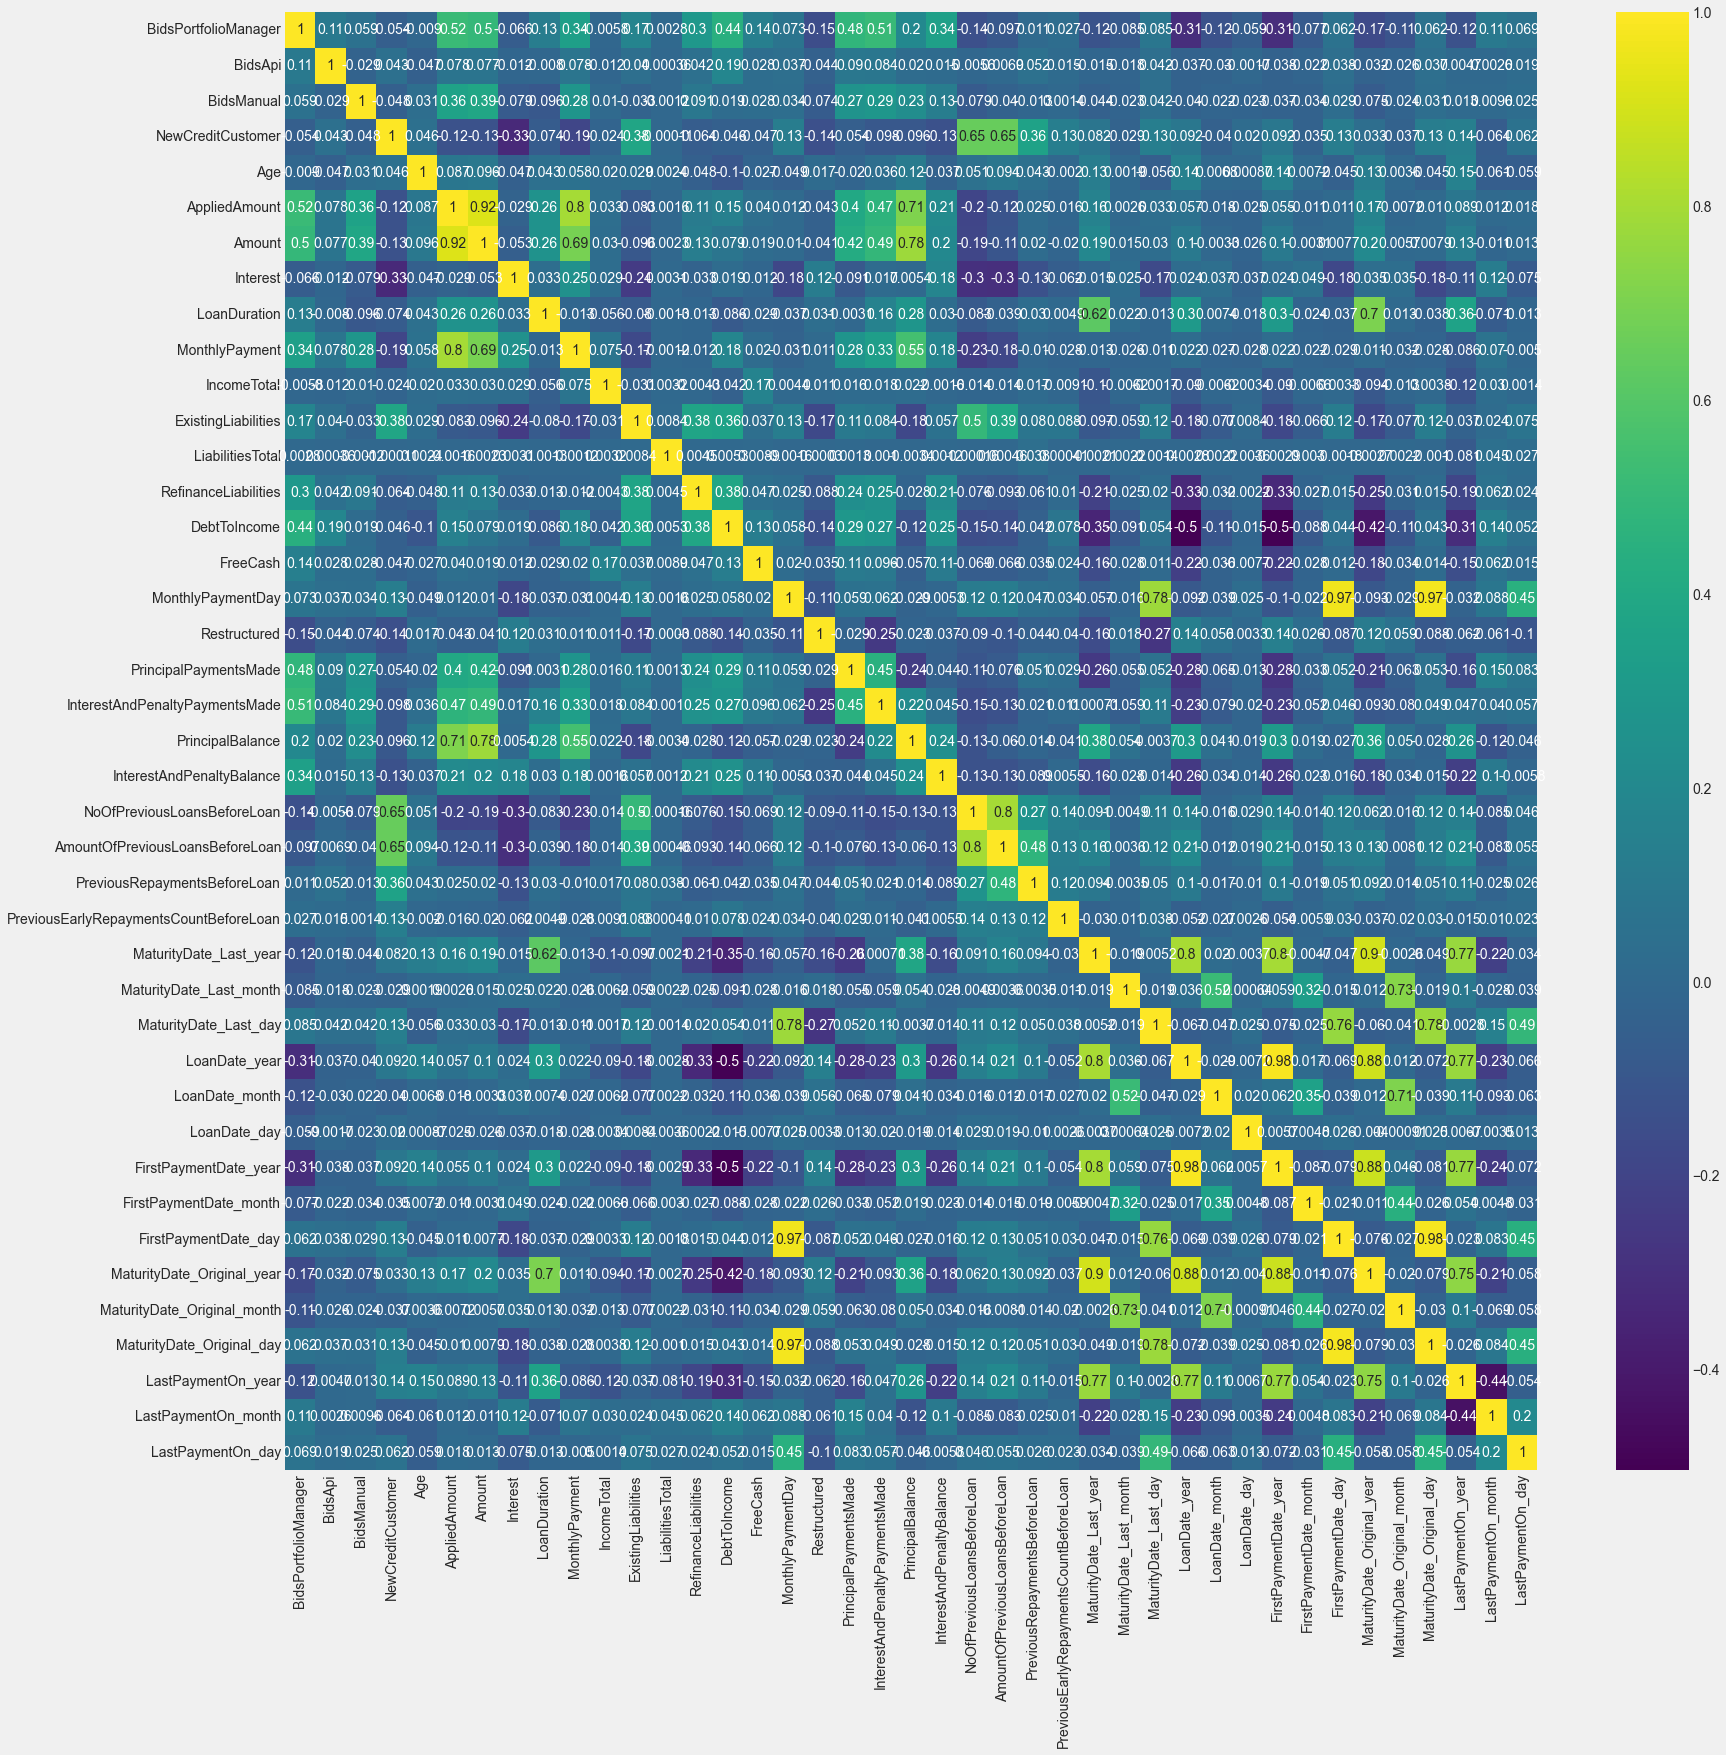

In [68]:
plt.figure(figsize=(25,25))
sns.heatmap(loan_df[numerical_cols].corr(),annot=True,cmap='viridis')

# Observations
* As Applied Ammount,Ammount increases monthlypayments,PrincipalBalance increase.
* As Loan Duration increases No of Rescheduled Payments also increases.
* Income increases Applied Ammount and Ammount increase and because of that Principal Balance increase e.g A->B,B->C therefore A->C
* No of Previous Loans increase AmmountofPreviousLoan also increase.
* As Unpaid Interest increases Principal that is overdue also increases.
* So there is slight Multicollinearity.

In [69]:
pd.crosstab(t_v , loan['UseOfLoan'])

UseOfLoan,Accounts receivable financing,Acquisition of real estate,Acquisition of stocks,Business,Construction finance,Education,Health,Home improvement,Loan consolidation,Not set category,Other,Other business,Purchase of machinery equipment,Real estate,Travel,Vehicle,Working capital financing
Status,,,,,,,,,,,,,,,,,
Current,0,0,0,207,0,107,152,1089,495,53769,772,0,0,112,166,266,0
Late,0,0,0,813,0,585,649,4007,2665,30432,4371,0,0,366,741,1143,0
Repaid,6,1,2,930,1,674,718,4095,3754,13745,4555,17,21,477,880,1741,5


# ENCODING

# <center><span style="color:#A8AD10;"> Preprocessing for Categorical data </span></center>
<center>We will use Z-Score for normalization</center>

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
labelencoder = LabelEncoder()

In [72]:
categorical_columns.shape

(134529, 15)

In [73]:
encode_cat = categorical_columns.apply(LabelEncoder().fit_transform)
encode_cat

,VerificationType,LanguageCode,Gender,Country,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,Rating,CreditScoreEsMicroL
0,1,1,0,0,234,6398,10,5,2,1,6,17,8,5,0
1,1,1,0,0,283,2709,10,1,1,1,0,5,8,5,0
2,1,1,0,0,732,5188,7,4,2,1,7,9,8,5,0
3,1,1,0,0,234,4689,8,0,4,2,5,13,8,5,0
4,1,1,0,0,856,6446,15,4,0,1,5,17,8,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134524,2,2,1,2,724,3258,8,5,4,1,0,13,0,5,0
134525,2,2,1,2,665,2231,7,5,4,1,0,18,8,2,0
134526,1,2,1,2,934,5981,8,5,2,0,0,4,8,4,0
134527,0,1,0,0,916,6955,10,1,2,1,0,8,11,2,0


In [74]:
df_main_dummy = pd.concat([numerical_columns,encode_cat], axis=1)

# display first five observations
df_main_dummy.head()
df_main_dummy.shape

(134529, 56)

# RANDOM FOREST

In [75]:
# set of independent variables
# create a copy of 'df_compensation_dummy' and store in the dataframe 'X_full'
X_full = df_main_dummy.copy()
# create a copy of 'df_target' and store in the dataframe 'y_full'
y_full = t_v.copy()
# to estimate the regression coefficient, a constant term of '1' needs to be added as a separate column
# 'sm.add_constant' adds the intercept to the model
X_full = sm.add_constant(X_full)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, random_state=1, test_size = 0.3)

# checking the dimensions of the train & test subset
# print dimension of train set
print('X_train_full', X_train_full.shape)
print('y_train_full', y_train_full.shape)

# print dimension of test set
print('X_test_full', X_test_full.shape)
print('y_test_full', y_test_full.shape)

print('X_clms: ',X_full.columns)# dependent variable

X_train_full (94170, 57)
y_train_full (94170,)
X_test_full (40359, 57)
y_test_full (40359,)
X_clms:  Index(['const', 'BidsPortfolioManager', 'BidsApi', 'BidsManual',
       'NewCreditCustomer', 'Age', 'AppliedAmount', 'Amount', 'Interest',
       'LoanDuration', 'MonthlyPayment', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Restructured', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'MaturityDate_Last_year',
       'MaturityDate_Last_month', 'MaturityDate_Last_day', 'LoanDate_year',
       'LoanDate_month', 'LoanDate_day', 'FirstPaymentDate_year',
       'FirstPaymentDate_month', 'FirstPaymentDate_day',
       'MaturityDate_Original_year', 'MaturityDate_Origin

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf_classification=RandomForestClassifier(n_estimators=10,random_state=10)

In [78]:
rf_model=rf_classification.fit(X_train_full,y_train_full)

In [79]:
rf_model1=rf_classification.fit(X_test_full,y_test_full)

In [80]:
from sklearn.metrics import classification_report

In [81]:
predict_rftrain=rf_model.predict(X_train_full)
predict_rftest=rf_model1.predict(X_test_full)

In [82]:
print(classification_report(y_train_full,predict_rftrain))

              precision    recall  f1-score   support

     Current       0.99      0.97      0.98     40027
        Late       0.96      0.99      0.97     32090
      Repaid       1.00      1.00      1.00     22053

    accuracy                           0.98     94170
   macro avg       0.98      0.99      0.98     94170
weighted avg       0.98      0.98      0.98     94170



In [83]:
print(classification_report(y_test_full,predict_rftest))

              precision    recall  f1-score   support

     Current       1.00      1.00      1.00     17108
        Late       1.00      1.00      1.00     13682
      Repaid       1.00      1.00      1.00      9569

    accuracy                           1.00     40359
   macro avg       1.00      1.00      1.00     40359
weighted avg       1.00      1.00      1.00     40359



In [84]:
feature_scores = pd.Series(rf_model1.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
feature_scores

InterestAndPenaltyBalance                0.319
PrincipalBalance                         0.167
LastPaymentOn_year                       0.121
FirstPaymentDate_year                    0.048
PrincipalPaymentsMade                    0.039
LastPaymentOn_month                      0.039
DebtToIncome                             0.031
LoanDate_year                            0.027
InterestAndPenaltyPaymentsMade           0.021
LastPaymentOn_day                        0.019
MaturityDate_Last_year                   0.019
MaturityDate_Last_day                    0.012
MaturityDate_Last_month                  0.011
FreeCash                                 0.011
PreviousRepaymentsBeforeLoan             0.010
MonthlyPayment                           0.009
Interest                                 0.008
Country                                  0.007
Rating                                   0.005
Amount                                   0.005
LoanDuration                             0.005
MaturityDate_

In [88]:
feature_scores

InterestAndPenaltyBalance                0.319
PrincipalBalance                         0.167
LastPaymentOn_year                       0.121
FirstPaymentDate_year                    0.048
PrincipalPaymentsMade                    0.039
LastPaymentOn_month                      0.039
DebtToIncome                             0.031
LoanDate_year                            0.027
InterestAndPenaltyPaymentsMade           0.021
LastPaymentOn_day                        0.019
MaturityDate_Last_year                   0.019
MaturityDate_Last_day                    0.012
MaturityDate_Last_month                  0.011
FreeCash                                 0.011
PreviousRepaymentsBeforeLoan             0.010
MonthlyPayment                           0.009
Interest                                 0.008
Country                                  0.007
Rating                                   0.005
Amount                                   0.005
LoanDuration                             0.005
MaturityDate_

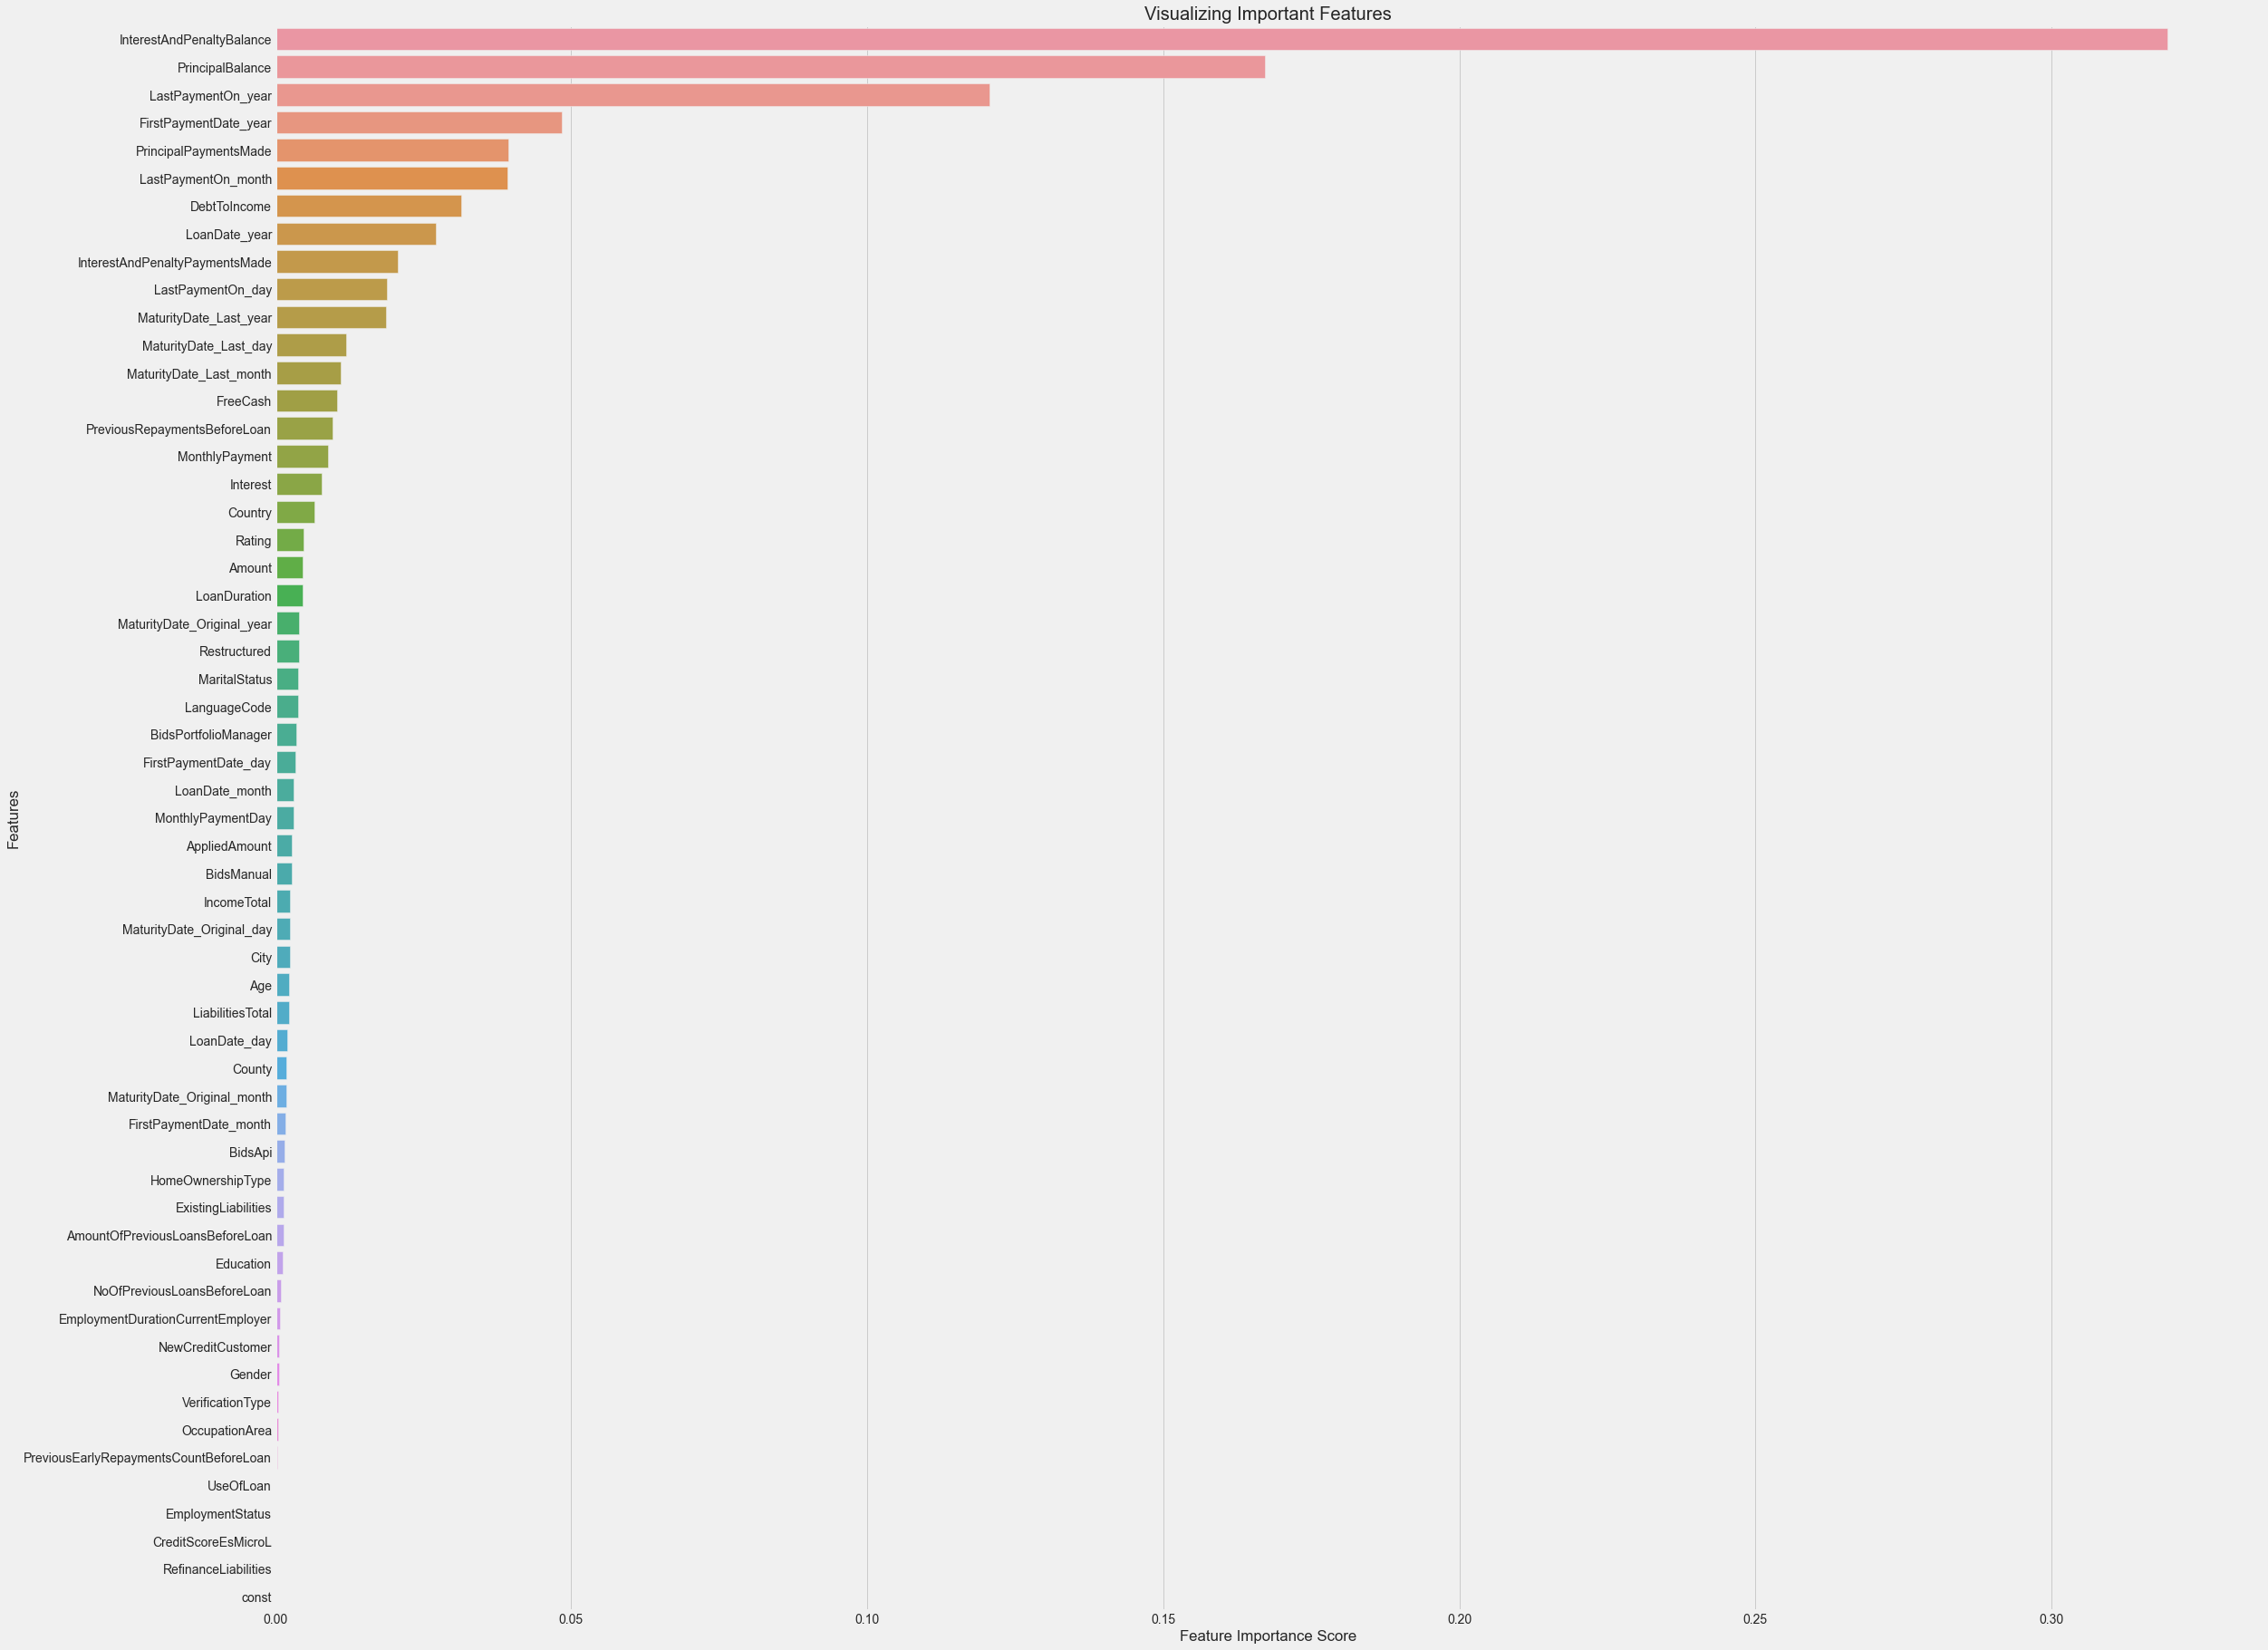

In [89]:
plt.figure(figsize=(35,30))
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

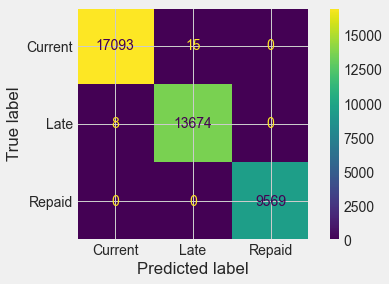

In [90]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(rf_model1,X_test_full,y_test_full)